In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Part 1: Data scraping and preparation

## **Step 1: Scrape your competitor's data**

Use Python to scrape data for the top 50 solar flares shown on SpaceWeatherLive. However, because SpaceWeatherLive now requires Javascript and Cookies to be enabled, I created a mirror: cmsc320's mirror of the SWL's top 50 solar flares. Steps to do this are:

1. **pip install** or **conda install** the following Python packages: beautifulsoup4, requests, pandas, numpy; these are already in the environment if you are using Docker.
2. Use **requests** to get (as in, HTTP GET) the URL
3. Extract the text from the page
4. Use BeautifulSoup to read and parse the data, either as html or lxml
5. Use prettify() to view the content and find the appropriate table
6. Use find() to save the aforementioned table as a variable
7. Use pandas to read in the HTML file. HINT make-sure the above data is properly typecast.
8. Set reasonable names for the table columns, e.g., rank, x_classification, date, region, start_time, maximum_time, end_time, movie. **Pandas.columns** makes this very simple.

In [2]:
url = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html") # get the URL
text = url.text # extract the text from the page
soup = BeautifulSoup(text, "lxml") # use BeautifulSoup to read and parst the data through lxml
# print(soup.prettify()) # view the content and find the appropriate table
table = soup.find("table").find('tbody') # save the table as a variable

column = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie'] # set the columns' names
df_SWL = pd.DataFrame(columns=column, index=range(1,51)) # new DataFrame for SpaceWeatherLive

# fill in the Dataframe
r = 0
for row in table.findAll('tr'):
    c = 0
    cols = row.findAll('td')
    for col in cols:
        df_SWL.iat[r, c] = col.get_text()
        c += 1
    r += 1

# remove the '+' from x_class so that they are all in the format of "letter+float"
df_SWL['x_class'] = df_SWL['x_class'].str.replace("+",'')
df_SWL['x_class'] = df_SWL['x_class'].str.lstrip('X').astype(float)
df_SWL['x_class'] = "X" + df_SWL.x_class.astype(str)

# Show the DataFrame of SpaceWeatherLive
df_SWL

<ipython-input-2-b7e5c6354cbc>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_SWL['x_class'] = df_SWL['x_class'].str.replace("+",'')


,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28.0,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
4,4,X17.0,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10.0,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9.0,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


## **Step 2: Tidy the top 50 solar flare data**

Your next step is to make sure this table is usable using pandas:

1. Drop the last column of the table, since we are not going to use it moving forward.
2. Use datetime import to combine the date and each of the three time columns into three datetime columns. You will see why this is useful later on. iterrows() should prove useful here.
3. Update the values in the dataframe as you do this. Set_value should prove useful.
4. Set regions coded as - as missing (NaN). You can use dataframe.replace() here.


In [3]:
# helper of mixing date and time into datetime
def to_datetime(date, time):
    if date == "NaN" or time == "NaN":
        return "NaN"
    if time == "24:00":
        result = datetime.datetime.strptime(date, '%Y/%m/%d')
        return result + datetime.timedelta(days=1)
    else:
        return datetime.datetime.strptime(date+time, '%Y/%m/%d%H:%M')

In [4]:
df_SWL.drop('movie', axis=1, inplace=True) # drop the last column of the table
# combine the date and time into datetime columns
for index, row in df_SWL.iterrows():
    df_SWL._set_value(index, 'start_datetime', to_datetime(row['date'], row['start_time']))
    df_SWL._set_value(index, 'max_datetime', to_datetime(row['date'], row['max_time']))
    df_SWL._set_value(index, 'end_datetime', to_datetime(row['date'], row['end_time']))

# update the DataFrame's columns' order
df_SWL = df_SWL[['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]

# Show the updated DataFrame of SpaceWeatherLive
df_SWL   

,rank,x_class,start_datetime,max_datetime,end_datetime,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


## **Step 3: Scrape the NASA data (15 pts)**

Next you need to scrape the data in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html (also available here) to get additional data about these solar flares. This table format is described here: http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm, and here:

In [5]:
text = requests.get("http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html").text # extract the text from the page
soup = BeautifulSoup(text, "lxml") # read and parse the data through lxml
# print(soup.prettify())
pre = soup.find("pre").text # find the table
raw_data = pre.split("\n")[12:530]

# pre-process the data
data = []
for rd in raw_data:
    temp1 = rd.split(" ")
    temp2 = []
    for elem in temp1:
        if elem != '':
            temp2 = temp2 + [elem]
    data = data + [temp2[0:15]]
    
# fill in the DataFrame
df_NASA = pd.DataFrame(data, columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_freq', 'end_freq', 'Loc', 'NOAA region', 'Imp', 'CME_date', 'CME_time', 'CPA', 'CME_width', 'CME_speed', 'plot'], index=range(1,519))

# Show the DataFrame of NASA
df_NASA

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA region,Imp,CME_date,CME_time,CPA,CME_width,CME_speed,plot
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418,PHTX
515,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571,PHTX
516,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163,PHTX
517,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX


## **Step 4: Tidy the NASA the table (15 pts)**

Now, we tidy up the NASA table. Here we will code missing observations properly, recode columns that correspond to more than one piece of information, and treat dates and times appropriately.

1. Recode any missing entries as NaN. Refer to the data description in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm (and above) to see how missing entries are encoded in each column. Be sure to look carefully at the actual data, as the nasa descriptions might not be completely accurate.
2. The CPA column (cme_angle) contains angles in degrees for most rows, except for halo flares, which are coded as Halo. Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as NA.
3. The width column indicates if the given value is a lower bound. Create a new column that indicates if width is given as a lower bound, and remove any non-numeric part of the width column.
4. Combine date and time columns for start, end and cme so they can be encoded as datetime objects.

In [6]:
is_halo = [] # new column for halo flare or not
width_lower_bound = [] # new column for the given value is a lower bound

for idx1, d in enumerate(data):
    for idx2, elem in enumerate(d):
        if "-" in elem:
            d[idx2] = "NaN" # recode any missing entries as NaN
        if elem == "Halo":
            is_halo.append("True")
            d[idx2] = "NA" # replace Halo entries as NA
        if ">" in elem:
            width_lower_bound.append(True)
            d[idx2] = elem[1:]
    if len(is_halo) == idx1:
        is_halo.append("False")
    if len(width_lower_bound) == idx1:
        width_lower_bound.append("False")

# update the DataFrame
df_NASA = pd.DataFrame(data, columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_freq', 'end_freq', 'Loc', 'NOAA region', 'Imp', 'CME_date', 'CME_time', 'CPA', 'CME_width', 'CME_speed', 'plot'], index=range(1,519))
df_NASA["is_halo"] = is_halo
df_NASA["width_lower_bound"] = width_lower_bound
for index, row in df_NASA.iterrows():
    df_NASA._set_value(index, 'start_datetime', to_datetime(row['start_date'], row['start_time']))
    df_NASA._set_value(index, 'end_datetime', to_datetime(row['start_date'][0:4]+"/"+row['end_date'], row['end_time']))
    df_NASA._set_value(index, 'CME_datetime', to_datetime(row['start_date'][0:4]+"/"+row['CME_date'], row['CME_time']))
df_NASA = df_NASA[['start_datetime', 'end_datetime', 'start_freq', 'end_freq', 'Loc', 'NOAA region', 'Imp', 'CME_datetime', 'CPA', 'CME_width', 'CME_speed', 'plot', 'is_halo', 'width_lower_bound']]

# Show the updated DataFrame for NASA
df_NASA

,start_datetime,end_datetime,start_freq,end_freq,Loc,NOAA region,Imp,CME_datetime,CPA,CME_width,CME_speed,plot,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,PHTX,True,False
515,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,PHTX,True,False
516,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,PHTX,True,False
517,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False


# Part 2: Analysis

## Question 1: Replication (10 pts)

Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

In [7]:
x = df_NASA.loc[df_NASA['Imp'].str.contains('X')]
print(len(x)) 

92


This means that the nunber of solar flares with Imp "X" has already exceed 50. Therefore, we only need to sort the number after all solar flares started with "X" and pick the top 50.

### Top 50 [NASA]

In [8]:
x.is_copy = False
x['Imp'] = x['Imp'].str.lstrip('X').astype(float)
x = x.sort_values('Imp', ascending=False).head(50)
x['Imp'] = "X" + x.Imp.astype(str)
x['NOAA region'] = x['NOAA region'].str[-4:]
x = x[['Imp', 'start_datetime', 'CME_datetime', 'end_datetime', 'NOAA region']]

top50_NASA = pd.DataFrame(columns=['x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region'], index=range(1,51))
r = 0
for index, row in x.iterrows():
    top50_NASA.iat[r, 0] = row['Imp']
    top50_NASA.iat[r, 1] = row['start_datetime']
    top50_NASA.iat[r, 2] = row['CME_datetime']
    top50_NASA.iat[r, 3] = row['end_datetime']
    top50_NASA.iat[r, 4] = row['NOAA region']
    r += 1
top50_NASA

<ipython-input-8-5279a2541b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Imp'] = x['Imp'].str.lstrip('X').astype(float)


,x_class,start_datetime,max_datetime,end_datetime,region
1,X28.0,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-05 00:00:00,0486
2,X20.0,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393
3,X17.0,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-30 00:00:00,0486
4,X14.0,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,9415
5,X10.0,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-30 00:00:00,0486
6,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100
7,X9.3,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,2673
8,X9.0,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,0930
9,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,0486
10,X8.3,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00,NaN


Let's take another look at the top 50 solar flares from SpaceWeatherLive.com

### Top 50 [SpaceWeatherLive.com]

In [9]:
top50_SWL = df_SWL[['x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]
top50_SWL

,x_class,start_datetime,max_datetime,end_datetime,region
1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


In [10]:
diff = pd.merge(top50_SWL, top50_NASA, on=['x_class'], how="outer", indicator=True)
diff=diff[diff['_merge'] =='left_only']
diff.reset_index(drop=True)
diff.index=np.arange(1, len(diff) + 1)
diff[['x_class','region_x','start_datetime_x','end_datetime_x']]

,x_class,region_x,start_datetime_x,end_datetime_x
1,X17.2,0486,2003-10-28 09:51:00,2003-10-28 11:24:00
2,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:55:00
3,X8.2,2673,2017-09-10 15:35:00,2017-09-10 16:31:00
4,X3.7,8384,1998-11-22 06:30:00,1998-11-22 06:49:00
5,X3.0,0030,2002-07-15 19:59:00,2002-07-15 20:14:00


The above list shows that there are as least 5 solar flares that exists in SpaceWeatherLive.com but not in the top 50 from NASA database, since this comparison is just based on the x_class.

So we can conclude that they are not eacly the same.

## Question 2: Integration (15 pts)

For each of the top 50 solar flares in the SpaceWeatherLive data, find the best matching row from the NASA data. Here, you have to decide for yourself how you determine what "best matching" means in this context. Multiple flares may match to the same row from the NASA data, depending on your chosen method. Also note that the structure of your code should follow the description above (i.e. for each in y:...).

In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches. Finally, use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset. If more than one SpaceWeatherLive entry "best matches", choose one and explain how you chose.

##### My standard of being "best match" (ordered in importance -- if the previous one cannot be fulfilled, then move to the next one):
1. close max_time ( +/- 1 day)
2. close start_time & close end_time ( +/- 12 hours)
3. same region
4. same x_class
5. back to max_time ( +/- 6 hours)

In [11]:
df_NASA['SWL_match'] = np.nan
df_NASA['NOAA region'] = df_NASA['NOAA region'].str[-4:]
indexes = ['NaN'] * 518

for i_SWL, flare in top50_SWL.iterrows():
    matches = []
    # filter by time
    for i_NASA, row in df_NASA.iterrows():
        # by max_datetime if possible
        if row['CME_datetime'] == row['CME_datetime']:
            if abs(flare['max_datetime'] - row['CME_datetime']) < datetime.timedelta(days = 1):
                matches.append(i_NASA)
        # by start and end datetime when there is no max_datetime
        else:
            if abs(flare['start_datetime'] - row['start_datetime']) < datetime.timedelta(hours = 12) and abs(flare['end_datetime'] - row['end_datetime']) < datetime.timedelta(hours = 12):
                matches.append(i_NASA)
    
    # filter by region if possible
    if len(matches) > 1:
        filtered = []
        for match in matches:
            if df_NASA.at[match, 'NOAA region'] != 'NaN':
                if flare['region'] == df_NASA.at[match, 'NOAA region']:
                    filtered.append(match)
            else:
                filtered.append(match)
        matches = filtered
        
    # filter by x_class
    if len(matches) > 1:
        filtered = []
        for match in matches:
            if df_NASA.at[match, 'Imp'] != 'NaN':
                letter_NASA = df_NASA.at[match, 'Imp'][0]
                number_NASA = float(df_NASA.at[match, 'Imp'][1:])
                letter_SWL = flare['x_class'][0]
                number_SWL = float(flare['x_class'][1:])
                if letter_NASA == letter_SWL and number_NASA == number_SWL:
                    filtered.append(match)
            else:
                filtered.append(match)
        matches = filtered
        
    # back to max_time
    if len(matches) > 1:
        filtered = []
        for match in matches:
            if abs(flare['max_datetime'] - df_NASA.at[match, 'CME_datetime']) < datetime.timedelta(hours = 6):
                filtered.append(match)
        matches = filtered
    
    # now that we have all those who has matches leaves only one "best match"
    if len(matches) != 0:
        df_NASA.at[matches[0], 'SWL_match'] = i_SWL
        
# new DataFrame with SWL match
# only keep the ones in NASA database that has a match with SWL data
df_NASA_SWL = df_NASA[df_NASA.SWL_match == df_NASA.SWL_match]
df_NASA_SWL.is_copy = False
df_NASA_SWL['SWL_match'] = df_NASA_SWL['SWL_match'].astype(int)

# Show the DataFrame in the ascending order of NASA original ranking
df_NASA_SWL

<ipython-input-11-7eee065ba0c9>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NASA_SWL['SWL_match'] = df_NASA_SWL['SWL_match'].astype(int)


,start_datetime,end_datetime,start_freq,end_freq,Loc,NOAA region,Imp,CME_datetime,CPA,CME_width,CME_speed,plot,is_halo,width_lower_bound,SWL_match
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False,7
20,1998-05-06 08:25:00,1998-05-06 08:35:00,14000,5000,S11W65,8210,X2.7,1998-05-06 08:29:00,309,190,1099,PHTX,False,False,48
83,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,X5.7,2000-07-14 10:54:00,NA,360,1674,PHTX,True,False,17
105,2000-11-26 17:00:00,2000-11-26 17:15:00,14000,7000,N18W38,9236,X4.0,2000-11-26 17:06:00,NA,360,980,PHTX,True,False,26
118,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
122,2001-04-06 19:35:00,2001-04-07 01:50:00,14000,230,S21E31,9415,X5.6,2001-04-06 19:30:00,NA,360,1270,PHTX,True,False,18
127,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,5
136,2001-08-25 16:50:00,2001-08-25 23:00:00,8000,170,S17E34,9591,X5.3,2001-08-25 16:50:00,NA,360,1433,PHTX,True,False,22
143,2001-09-24 10:45:00,2001-09-25 20:00:00,7000,30,S16E23,9632,X2.6,2001-09-24 10:30:00,NA,360,2402,PHTX,True,False,50
158,2001-12-11 12:45:00,2001-12-11 17:00:00,4500,750,SW90b,NaN,NaN,2001-12-11 09:54:00,263,121,891,PHTX,False,False,44


In [12]:
# again in the ascending order of SpaceWeatherLive
df_NASA_SWL = df_NASA_SWL.sort_values('SWL_match')
df_NASA_SWL

,start_datetime,end_datetime,start_freq,end_freq,Loc,NOAA region,Imp,CME_datetime,CPA,CME_width,CME_speed,plot,is_halo,width_lower_bound,SWL_match
241,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,0486,X28.,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False,1
118,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,0486,X17.,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False,3
317,2005-09-07 18:05:00,2005-09-08 00:00:00,12000,200,S11E77,0808,X1.7,NaT,NaN,NaN,NaN,PHTX,False,False,4
127,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,5
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,0486,X10.,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False,6
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False,7
515,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,2673,X9.3,2017-09-06 12:24:00,NA,360,1571,PHTX,True,False,8
329,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,0930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,9
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,0486,X8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False,10


## Question 3: Analysis (10 pts)

Prepare one plot that shows the top 50 solar flares in context with all data available in the NASA dataset. Here are some possibilities (you can do something else)

1. Plot attributes in the NASA dataset (e.g., starting or ending frequenciues, flare height or width) over time. Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.

2. Do flares in the top 50 tend to have Halo CMEs? You can make a barplot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.

3. Do strong flares cluster in time? Plot the number of flares per month over time, add a graphical element to indicate (e.g., text or points) to indicate the number of strong flares (in the top 50) to see if they cluster.

In [13]:
NASA = df_NASA.loc[df_NASA['Imp'].str.contains('X')]
NASA['Imp'] = NASA['Imp'].str.lstrip('X').astype(float)
NASA = NASA.sort_values('Imp', ascending=False).head(50)
NASA['Imp'] = "X" + NASA.Imp.astype(str)
NASA['NOAA region'] = NASA['NOAA region'].str[-4:]

years = []
for index, row in NASA.iterrows():
    years.append(row['start_datetime'].year)

NASA['year'] = years

<ipython-input-13-01ab0191e777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA['Imp'] = NASA['Imp'].str.lstrip('X').astype(float)


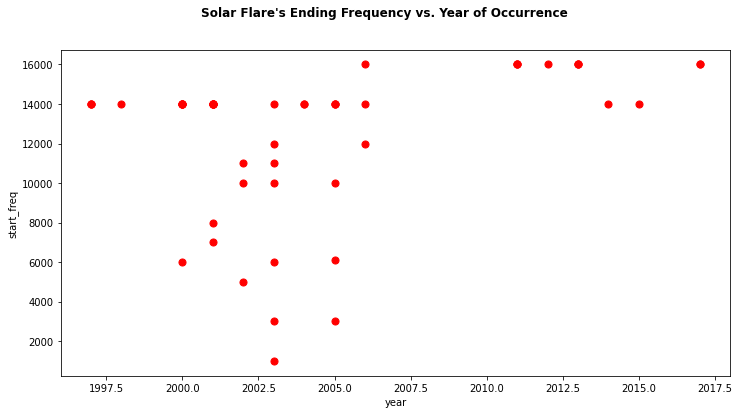

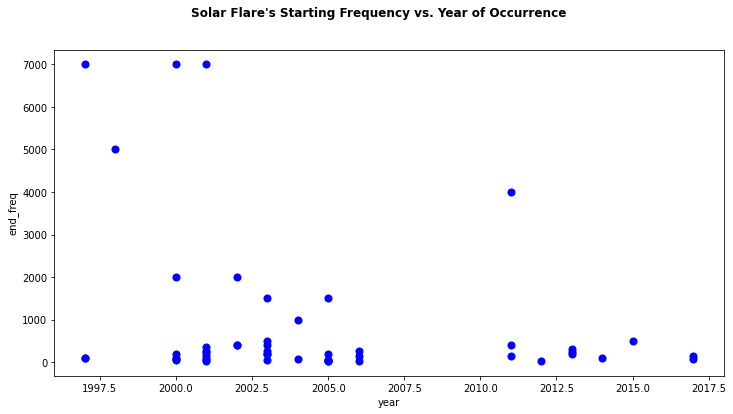

In [14]:
NASA['start_freq'] = NASA['start_freq'].astype(int)
NASA = NASA.sort_values('start_freq', ascending=True)
NASA.plot.scatter('year', 'start_freq', s=50, color='red', marker='o', figsize=(12, 6))
plt.suptitle("Solar Flare's Ending Frequency vs. Year of Occurrence", fontweight="bold")

NASA['end_freq'] = NASA['end_freq'].astype(int)
NASA = NASA.sort_values('end_freq', ascending=True)
NASA.plot.scatter('year', 'end_freq', s=50, color='blue', marker='o', figsize=(12, 6))
plt.suptitle("Solar Flare's Starting Frequency vs. Year of Occurrence", fontweight="bold")

plt.show()

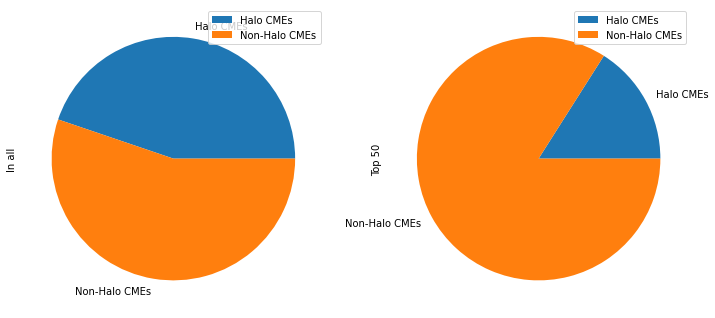

In [15]:
halo = df_NASA.is_halo.value_counts('True')[1]
nothalo = 1 - halo
halo50 = NASA.is_halo.value_counts('True')[1]
nothalo50 = 1 - halo50

halo_prop = pd.DataFrame({'In all': [halo, nothalo], 'Top 50': [halo50, nothalo50]}, index=['Halo CMEs', 'Non-Halo CMEs'])
plot = halo_prop.plot.pie(subplots=True, figsize=(12,6))

It is less likely for high-class solar flares to be Halo CME than the general types.

Text(0.5, 0.98, 'Count of flares by months')

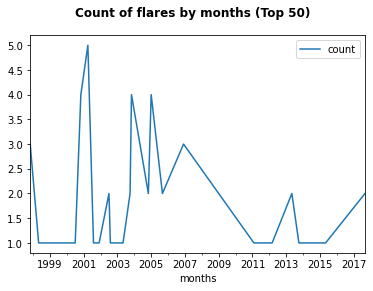

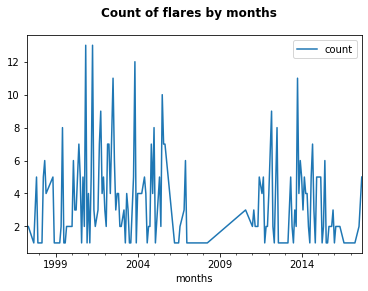

In [16]:
NASA['months'] = NASA['start_datetime'].dt.to_period('m')
NASA1 = NASA.groupby('months').size().reset_index().rename(columns={0: 'count'})
NASA1.plot.line(x='months', y='count', fig=(12, 6))
plt.suptitle("Count of flares by months (Top 50)", fontweight="bold")

df_NASA['months'] = df_NASA['start_datetime'].dt.to_period('m')
df_NASA1 = df_NASA.groupby('months').size().reset_index().rename(columns={0: 'count'})
df_NASA1.plot.line(x='months', y='count', fig=(12, 6))
plt.suptitle("Count of flares by months", fontweight="bold")

There is a certain cluster during 2000~2007, with the number of high-class flares in 2001 up to 5. But the cluster is not that obvious if all the other data are taking into consideration.